In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\dwang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dwang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dwang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dwang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

2.0.0-alpha0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu', name='Layer_1'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')    
])

"""
the last layer can also be:
    Dense(10),
    Softmax()
"""

'\nthe last layer can also be:\n    Dense(10),\n    Softmax()\n'

In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.trainable

True

In [9]:
model.weights

[<tf.Variable 'Layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 1.09632835e-02, -1.41698048e-02,  1.94181502e-02, ...,
         -5.05702198e-03, -3.85807194e-02, -1.27540529e-02],
        [ 4.89823520e-02,  2.67598554e-02, -8.62390548e-02, ...,
          5.04323244e-02,  1.95948109e-02,  5.19204438e-02],
        [-3.27512063e-02,  6.17251545e-02,  2.08494440e-02, ...,
          3.81240174e-02,  7.17717409e-02, -4.01459783e-02],
        ...,
        [-1.41889006e-02,  6.40412420e-02,  5.62579632e-02, ...,
         -8.56758952e-02,  3.90716344e-02,  4.35858965e-05],
        [ 2.27536708e-02, -5.38604371e-02,  7.35933632e-02, ...,
          8.26082528e-02, -5.37647381e-02,  3.18652987e-02],
        [ 2.76816115e-02,  4.60401773e-02,  6.37128651e-02, ...,
          1.84608623e-02,  1.10246465e-02,  5.29168844e-02]], dtype=float32)>,
 <tf.Variable 'Layer_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [8]:
# Build the Sequential convolutional neural network model
model1=Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),data_format='channels_last'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])


In [9]:
# Print the model summary
model1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [16]:
model1.trainable

False

In [27]:
model1.layers[-2].name

'flatten_1'

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [13]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy','mae'])


In [14]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x00000210F29DA7F0>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x00000210F2A26E48>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [15]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [16]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [17]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [18]:
train_labels.shape

(60000,)

In [56]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [19]:
# Rescale the image values so that they lie in between 0 and 1.
train_images=train_images/255.0
test_images=test_images/255.0


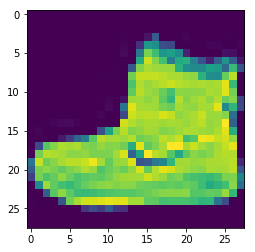

Ankle boot


In [66]:
# Display one of the images
i=0
img=train_images[i,:,:]
plt.imshow(img)
plt.show()
print(labels[train_labels[i]])


#### Fit the model

In [21]:
# Fit the model
#history=model.fit(train_images[...,np.newaxis],train_labels, epochs=2, batch_size=256)
history=model.fit(train_images,train_labels, epochs=2, batch_size=256)

Epoch 1/2
60000/60000 [==============================] - 1s 21us/sample - loss: 0.9666 - accuracy: 0.6714 - mae: 4.4200
Epoch 2/2
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5112 - accuracy: 0.8263 - mae: 4.4200


In [23]:
train_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [30]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Plot training history

In [68]:
# Load the history into a pandas Dataframe
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.845403,0.722617,4.419999
1,0.507480,0.819267,4.420001
2,0.452277,0.838333,4.419999
3,0.422533,0.849500,4.420001
4,0.402410,0.857833,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

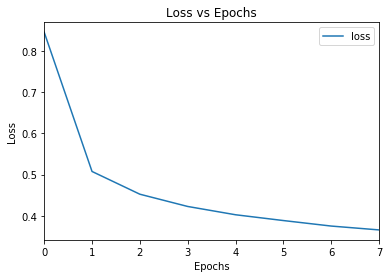

In [69]:
# Make a plot for the loss
loss_plot=df.plot(y='loss',title='Loss vs Epochs', legend=True)
loss_plot.set(xlabel='Epochs',ylabel='Loss')


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

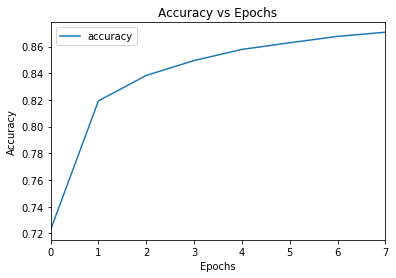

In [70]:
# Make a plot for the accuracy
acc_plot=df.plot(y='accuracy',title='Accuracy vs Epochs', legend=True)
acc_plot.set(xlabel='Epochs',ylabel='Accuracy')

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

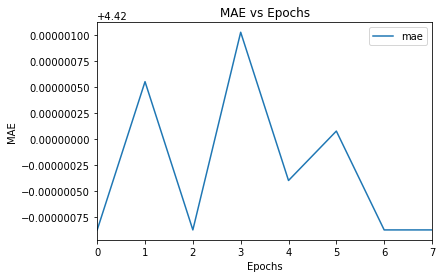

In [71]:
# Make a plot for the additional metric
mae_plot=df.plot(y='mae',title='MAE vs Epochs', legend=True)
mae_plot.set(xlabel='Epochs',ylabel='MAE')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [72]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [73]:
# Evaluate the model
model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)


10000/1 - 5s - loss: 0.2941 - accuracy: 0.8600 - mae: 4.4200


[0.3902750833749771, 0.86, 4.419997]

#### Make predictions from the model

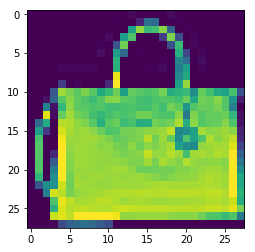

Label: Bag


In [74]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
random_inx=30
test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [75]:
# Get the model predictions
prediction=model.predict(test_image[np.newaxis,...,np.newaxis])
prediction

array([[4.6192795e-07, 2.4217135e-09, 3.1308759e-06, 9.1956241e-07,
        8.9202431e-06, 3.7206442e-07, 2.9897428e-06, 3.3344943e-08,
        9.9998319e-01, 2.3324832e-08]], dtype=float32)

In [76]:
print(f"model prediction: {labels[np.argmax(prediction)]}")

model prediction: Bag
